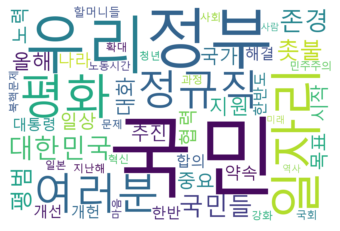

In [2]:
from konlpy.tag import Hannanum
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 파일 열기
text = open('./data/2018_president_message.txt', encoding='cp949').read()

# 한글 형태소 분석하기
engin = Hannanum()
nouns = engin.nouns(text)

# 추출한 명사 중에 단음절(글자 1개)를 제외하고 두 글자 이상으로 구성도는 문자를 리스트로 담기 
nouns = [n for n in nouns if len(n) > 1]

# 단어 숫자 세기
count = Counter(nouns)
# most_common() 메소드는 개수가 가장 많은 순서대로 입력받은 숫자만큼 추출하여 (단어, 개수) 형태의 튜플로 반환하는 메소드로, 예제는 빈도수가 많은 상위 50개를 추출한다는 의미
tags = count.most_common(50)

# 워드 클라우드 이미지 생성하기
wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf', 
                     background_color = 'white',
                     width = 1200,
                     height = 800).generate_from_frequencies(dict(tags))

# 화면에 출력하기
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# SVG 객체로 이미지 저장하기
plt.savefig('./output/2018_president_message_wordcloud.svg')